In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file into a DataFrame
CHI = pd.read_csv('CHI_DATA_INPUT.csv')

# Check the shape of the dataFrame
CHI.shape

(6178, 34)

In [3]:
# Simplify feature names:
CHI = CHI.rename(columns={'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'URL',
                                   'STATE OR PROVINCE': 'STATE',
                                   'ZIP OR POSTAL CODE': 'ZIP',
                                   'SQUARE FEET': 'SQFT',
                                   'PROPERTY TYPE': 'PROP_TYPE',
                                   'LOT SIZE': 'LOT',
                                   'YEAR BUILT': 'YR_BUILT',
                                   '$/SQUARE FEET': 'PRICE_SQFT',
                                   })

In [4]:
selected = ['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT', 'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

data_df = CHI[selected].copy(deep=True)

In [5]:
data_df.head()

,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family (2-4 Unit),12251 S Lowe Ave,Chicago,60628,150000,CHI - West Pullman,NaN,1890,11971272,41.670989,-87.637762,26,3468,7804,14,1
1,Single Family Residential,12247 S Wallace St,Chicago,60628,47000,CHI - West Pullman,1100.0,1903,11889116,41.670992,-87.636609,146,3417,7780,12,1
2,Single Family Residential,12130 S Lowe Ave,Chicago,60628,69999,CHI - West Pullman,2250.0,1900,11938140.0,41.673240,-87.638399,66,3197,7489,24,1
3,Single Family Residential,503 W 125th St,Chicago,60628,185000,CHI - West Pullman,1120.0,1951,11919204,41.666739,-87.634544,137,3944,8371,13,0
4,Single Family Residential,12022 S Wentworth Ave,Chicago,60628,189900,CHI - West Pullman,NaN,0,11919207,41.675471,-87.627681,397,2515,7002,20,0


In [6]:
# Check out null values
null_sum = data_df.isnull().sum()
null_sum

PROP_TYPE        0
ADDRESS          0
CITY             1
ZIP              0
PRICE            0
LOCATION        77
SQFT          2479
YR_BUILT         0
MLS#             8
LATITUDE         0
LONGITUDE        0
PARK_DIST        0
HOSPITAL_D       0
RAIL_DIST        0
BUS_COUNTS       0
FnB_COUNTS       0
dtype: int64

In [7]:
data_df.shape, data_df.columns

((6178, 16),
 Index(['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT',
        'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D',
        'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS'],
       dtype='object'))

In [8]:
cat_col = ['PROP_TYPE', 'CITY', 'ZIP', 'LOCATION']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,PROP_TYPE,CITY,ZIP,LOCATION
0,Multi-Family (2-4 Unit),Chicago,60628,CHI - West Pullman
1,Single Family Residential,Chicago,60628,CHI - West Pullman
2,Single Family Residential,Chicago,60628,CHI - West Pullman
3,Single Family Residential,Chicago,60628,CHI - West Pullman
4,Single Family Residential,Chicago,60628,CHI - West Pullman
...,...,...,...,...
6173,Condo/Co-op,Oak Lawn,60453,Oak Lawn
6174,Single Family Residential,Chicago,60638,CHI - Garfield Ridge
6175,Single Family Residential,Calumet Park,60827,Calumet Park
6176,Condo/Co-op,Elmwood Park,60707,Elmwood Park


In [9]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

PROP_TYPE    category
CITY         category
ZIP          category
LOCATION     category
dtype: object

In [10]:
# count the #samples fall into each category
data_df['CITY'].value_counts() 

Chicago             6049
Oak Park              15
Elmwood Park          14
Evergreen Park        12
Calumet Park          11
Evanston              10
Norridge               9
Oak Lawn               9
Cicero                 8
Harwood Heights        5
Alsip                  4
Park Ridge             4
Lincolnwood            4
Nottingham Park        3
Hometown               3
River Grove            3
Rosemont               3
Burbank                2
Burnham                2
Stickney               2
Merrionette Park       1
Niles                  1
Dolton                 1
Riverdale              1
Summit                 1
Name: CITY, dtype: int64

In [11]:
# check the data of PROPERTY TYPE
data_df['PROP_TYPE'].value_counts() 

Condo/Co-op                  2427
Single Family Residential    1683
Multi-Family (2-4 Unit)       806
Vacant Land                   740
Parking                       208
Multi-Family (5+ Unit)        155
Townhouse                     154
Mobile/Manufactured Home        3
Ranch                           1
Unknown                         1
Name: PROP_TYPE, dtype: int64

In [12]:
# Merge two seperate multi-family categories into one single category
data_df['PROP_TYPE'].replace(['Multi-Family (5+ Unit)', 'Multi-Family (2-4 Unit)'],'Multi-Family', inplace=True)

In [13]:
data_df['PROP_TYPE'].value_counts() 

Condo/Co-op                  2427
Single Family Residential    1683
Multi-Family                  961
Vacant Land                   740
Parking                       208
Townhouse                     154
Mobile/Manufactured Home        3
Ranch                           1
Unknown                         1
Name: PROP_TYPE, dtype: int64

In [14]:
# Parking sapces are irrelevant to my research question
# I use the following code to remove them
data_df = data_df[~data_df['PROP_TYPE'].str.contains('Parking')]

In [15]:
data_df['PROP_TYPE'].value_counts() 

Condo/Co-op                  2427
Single Family Residential    1683
Multi-Family                  961
Vacant Land                   740
Townhouse                     154
Mobile/Manufactured Home        3
Ranch                           1
Unknown                         1
Parking                         0
Name: PROP_TYPE, dtype: int64

In [16]:
data_df.head()

,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family,12251 S Lowe Ave,Chicago,60628,150000,CHI - West Pullman,NaN,1890,11971272,41.670989,-87.637762,26,3468,7804,14,1
1,Single Family Residential,12247 S Wallace St,Chicago,60628,47000,CHI - West Pullman,1100.0,1903,11889116,41.670992,-87.636609,146,3417,7780,12,1
2,Single Family Residential,12130 S Lowe Ave,Chicago,60628,69999,CHI - West Pullman,2250.0,1900,11938140.0,41.673240,-87.638399,66,3197,7489,24,1
3,Single Family Residential,503 W 125th St,Chicago,60628,185000,CHI - West Pullman,1120.0,1951,11919204,41.666739,-87.634544,137,3944,8371,13,0
4,Single Family Residential,12022 S Wentworth Ave,Chicago,60628,189900,CHI - West Pullman,NaN,0,11919207,41.675471,-87.627681,397,2515,7002,20,0


In [17]:
null_sum = data_df.isnull().sum()
null_sum

PROP_TYPE        0
ADDRESS          0
CITY             1
ZIP              0
PRICE            0
LOCATION        77
SQFT          2271
YR_BUILT         0
MLS#             8
LATITUDE         0
LONGITUDE        0
PARK_DIST        0
HOSPITAL_D       0
RAIL_DIST        0
BUS_COUNTS       0
FnB_COUNTS       0
dtype: int64

In [18]:
len(data_df)

5970

In [19]:
data_df.drop(data_df[data_df['CITY'].isna()].index, inplace=True)

In [20]:
data_df.drop(data_df[data_df['LOCATION'].isna()].index, inplace=True)

In [21]:
null_sum = data_df.isnull().sum()
null_sum

PROP_TYPE        0
ADDRESS          0
CITY             0
ZIP              0
PRICE            0
LOCATION         0
SQFT          2241
YR_BUILT         0
MLS#             0
LATITUDE         0
LONGITUDE        0
PARK_DIST        0
HOSPITAL_D       0
RAIL_DIST        0
BUS_COUNTS       0
FnB_COUNTS       0
dtype: int64

In [22]:
data_df['PROP_TYPE'].value_counts() 

Condo/Co-op                  2409
Single Family Residential    1649
Multi-Family                  940
Vacant Land                   739
Townhouse                     151
Mobile/Manufactured Home        3
Ranch                           1
Unknown                         1
Parking                         0
Name: PROP_TYPE, dtype: int64

In [23]:
data_df.drop(data_df[data_df['PROP_TYPE'] == 'Vacant Land'].index, inplace=True)

In [24]:
len(data_df)

5154

In [25]:
average_sqft = data_df[data_df['SQFT'].notnull()]['SQFT'].mean()

data_df.loc[data_df['SQFT'].isnull(), 'SQFT'] = average_sqft

average_yr = data_df[data_df['YR_BUILT'] != 0]['YR_BUILT'].mean()

data_df.loc[data_df['YR_BUILT'] == 0, 'YR_BUILT'] = average_yr

In [26]:
data_df.columns

Index(['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT',
       'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D',
       'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS'],
      dtype='object')

In [27]:
num_col = ['PRICE', 'SQFT', 'YR_BUILT', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

In [28]:
data_df[num_col].describe()

,PRICE,SQFT,YR_BUILT,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
count,5.154000e+03,5154.000000,5154.000000,5154.000000,5154.000000,5154.000000,5154.000000,5154.000000
mean,6.771614e+05,2025.422782,1954.535661,398.728754,2288.929375,2052.604773,44.336244,58.089057
std,1.048667e+06,1687.731753,42.768571,331.386412,1698.348558,2191.131304,21.458078,91.218221
min,1.000000e+00,1.000000,1698.000000,0.000000,63.000000,51.000000,0.000000,0.000000
25%,2.399990e+05,1242.750000,1918.000000,157.250000,1094.000000,626.000000,31.000000,2.000000
50%,3.770000e+05,2025.422782,1954.535661,321.000000,1958.500000,1158.000000,41.000000,14.000000
75%,6.999000e+05,2025.422782,2000.000000,562.000000,2884.750000,2681.750000,53.000000,74.000000
max,2.350000e+07,65000.000000,2024.000000,4813.000000,12686.000000,15069.000000,115.000000,433.000000


<Axes: xlabel='YR_BUILT'>

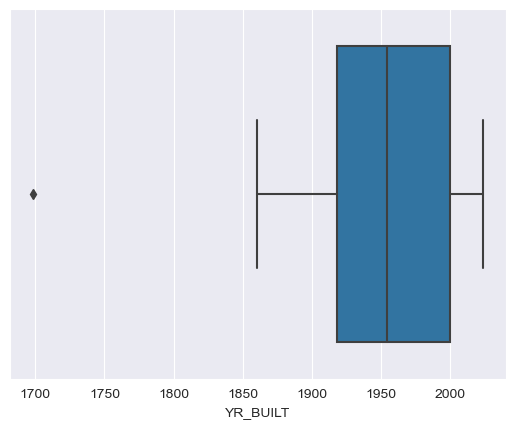

In [29]:
# draw box plot to check outliers
attr = 'YR_BUILT'
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df[attr], orient='h')

In [30]:
Q1 = data_df[attr].quantile(0.25)
Q3 = data_df[attr].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

1918.0 2000.0 1795.0 2123.0


In [31]:
import copy
data_check = copy.deepcopy(data_df)

data_check



,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family,12251 S Lowe Ave,Chicago,60628,150000,CHI - West Pullman,2025.422782,1890.000000,11971272,41.670989,-87.637762,26,3468,7804,14,1
1,Single Family Residential,12247 S Wallace St,Chicago,60628,47000,CHI - West Pullman,1100.000000,1903.000000,11889116,41.670992,-87.636609,146,3417,7780,12,1
2,Single Family Residential,12130 S Lowe Ave,Chicago,60628,69999,CHI - West Pullman,2250.000000,1900.000000,11938140.0,41.673240,-87.638399,66,3197,7489,24,1
3,Single Family Residential,503 W 125th St,Chicago,60628,185000,CHI - West Pullman,1120.000000,1951.000000,11919204,41.666739,-87.634544,137,3944,8371,13,0
4,Single Family Residential,12022 S Wentworth Ave,Chicago,60628,189900,CHI - West Pullman,2025.422782,1954.535661,11919207,41.675471,-87.627681,397,2515,7002,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,Condo/Co-op,4410 W 111th St #301,Oak Lawn,60453,129900,Oak Lawn,2025.422782,1972.000000,11944126,41.691352,-87.730402,1413,11728,12673,0,0
6174,Single Family Residential,4952 S Laramie Ave,Chicago,60638,99500,CHI - Garfield Ridge,2025.422782,1937.000000,11970645.0,41.802575,-87.753289,332,8414,2932,8,1
6175,Single Family Residential,1005 W 123rd St,Calumet Park,60827,62500,Calumet Park,1264.000000,1954.535661,11925316.0,41.670262,-87.646918,391,4080,8163,12,1
6176,Condo/Co-op,7234 W North Ave #605,Elmwood Park,60707,73000,Elmwood Park,500.000000,1976.000000,11906747.0,41.909142,-87.807799,1821,2298,3374,20,2


In [32]:
for attr in num_col:
    Q1 = data_check[attr].quantile(0.25)
    Q3 = data_check[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 1.5 * IQR
    upper_thresh = Q3 + 1.5 * IQR
    print(attr, Q1, Q3, lower_thresh, upper_thresh)

    # Use | for logical OR and additional parentheses for proper order of operations
    data_check.drop(data_check[(data_check[attr] > upper_thresh) | (data_check[attr] < lower_thresh)].index, inplace=True)

# Print the length of the filtered DataFrame
print(len(data_check))


PRICE 239999.0 699900.0 -449852.5 1389751.5
SQFT 1200.0 2025.4227820372398 -38.13417305585972 3263.5569550930995
YR_BUILT 1918.0 1991.0 1808.5 2100.5
PARK_DIST 162.0 582.0 -468.0 1212.0
HOSPITAL_D 1159.5 2977.25 -1567.125 5703.875
RAIL_DIST 634.0 2610.0 -2330.0 5574.0
BUS_COUNTS 33.0 54.0 1.5 85.5
FnB_COUNTS 2.0 57.0 -80.5 139.5
3277


In [33]:
# Export df to csv:

data_check.to_csv('CHI_DATA_OUTPUT.csv')